<a href="https://colab.research.google.com/github/AnthonySunYi/Verilog_DSL/blob/main/VerilogGitHomework_1004944_Anthony_Sun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [2]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

# Homework

Copy this ipynb to your Github and link to Google Colab for Verilog HDL simulation.

Submit the copy of ipynb with complete solution to the DSL Edimension: Homework Submission.

# Q1-Decade Counter

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the decade_counter as shown below using if-else statements.
3. Submit this file to DSL edimension for assessment;
4. The specification of the decade_counter are:
  - When "rst" is high, the output "count" and output "ten" are set to ‘0’ immediately and counting is disabled.
  - When "rst" is low, the circuit increments on every positive edge of the clk.
  - The highest count that can be reached is 4'b1001, after which the count will restart from 4'b0000 again.
  - Only when the count is 4'b1001, the output ten is set to ‘1’ else the output ten will always be set to ‘0’.

5. Write a Verilog test stimulus module for the decade_counter and verify its proper operation as follows:
  - Create a clock (Period: 20 unit time);
  - Test for reset active;
  - Then test for the counting for 1 complete count cycles ie: counting from 4'b0000 to 4'b1001;
  - Use Weveform Viewer for viewing the inputs and outputs;
  - Here is Verilog code template.

In [ ]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter(
    input clk,
    input rst,
    output reg [3:0] count,
    output reg ten
);

// Counter logic
always @(posedge clk or posedge rst) begin
    if (rst) begin
        count <= 4'b0000;
        ten <= 1'b0;
    end
    else begin
        if (count == 4'b1001) begin
            count <= 4'b0000;
            ten <= 1'b1;
        end
        else begin
            count <= count + 1;
            ten <= 1'b0;
        end
    end
end

endmodule
////

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter_tb();

reg clk;
reg rst;
wire [3:0]count;
wire ten;

decade_counter decade_counter_u0(
    .clk(clk),
    .rst(rst),
    .count(count),
    .ten(ten)
);

// Generate 20 unit time clock
always begin
    #10 clk = ~clk; // Toggle clock every 10 time units (20-time unit period)
end

initial begin
    $dumpfile("waveform.vcd");
    $dumpvars(0, decade_counter_tb);

    // Initialize signals
    clk = 0;
    rst = 1;
    #20 rst = 0; // Release reset after 20 time units

    // Let the counter run for one complete cycle
    #200;

    // End simulation
    $finish;
end

endmodule



Installing. Please wait... done!
VCD info: dumpfile waveform.vcd opened for output.



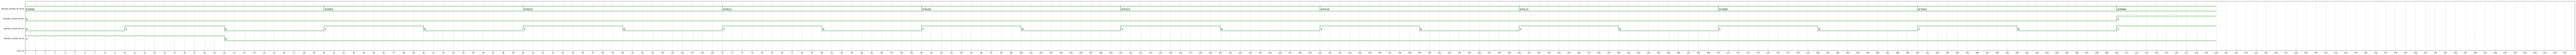

In [ ]:
%%waveform waveform.vcd
sign_list = ['decade_counter_tb.count', 'decade_counter_tb.ten', 'decade_counter_tb.clk', 'decade_counter_tb.rst']
time_begin = 0
time_end = 255

base = 'bin' # bin, dec, dec2, hex, octal


6. The following figure is the test results for reference only. Your results maybe cover more test case if required.

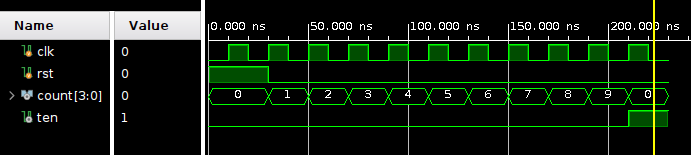

# Q2-Multiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the multiplexer as shown below using case statements.
3. The specifications of the multiplexer are:
  - The circuit is a 4-to-1 multiplexer;
  - The inputs A, B, C, D and output X are all 2-bit vectors;
  - Output X will be equal to either one of the 4 inputs depending on the 4 combinations of 2-bits signal SEL. The following True-table details the relationship between SEL and output X;

| SEL   | OUTPUT X |
|-------|----------|
| 2'b00 | A        |
| 2'b01 | B        |
| 2'b10 | C        |
| 2'b11 | D        |


4. Write a Verilog test stimulus module for the multiplexer;


In [ ]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module multiplexer(
    input [1:0] A,
    input [1:0] B,
    input [1:0] C,
    input [1:0] D,
    input [1:0] SEL,
    output reg [1:0] X
);

// Multiplexer logic using case statement
always @(*) begin
    case (SEL)
        2'b00: X = A;
        2'b01: X = B;
        2'b10: X = C;
        2'b11: X = D;
        default: X = 2'b00; // Default case to avoid ambiguity
    endcase
end

endmodule

module tb_multiplexer;
    reg [1:0] A, B, C, D;
    reg [1:0] SEL;
    wire [1:0] X;

    // Instantiate the multiplexer
    multiplexer uut (
        .A(A),
        .B(B),
        .C(C),
        .D(D),
        .SEL(SEL),
        .X(X)
    );

    initial begin
        $dumpfile("waveform.vcd");  // Waveform dump file
        $dumpvars(0, tb_multiplexer);

        // Monitor changes and display them
        $monitor("Time: %0d | A=%b | B=%b | C=%b | D=%b | SEL=%b | X=%b",
                 $time, A, B, C, D, SEL, X);

        // Initialize inputs
        A = 2'b11;
        B = 2'b10;
        C = 2'b01;
        D = 2'b00;

        // Apply test cases with SEL changing
        SEL = 2'b00; #10;  // Expect X = A (00)
        SEL = 2'b01; #10;  // Expect X = B (01)
        SEL = 2'b10; #10;  // Expect X = C (10)
        SEL = 2'b11; #10;  // Expect X = D (11)

        // End simulation
        $finish;
    end
endmodule

VCD info: dumpfile waveform.vcd opened for output.
Time: 0 | A=11 | B=10 | C=01 | D=00 | SEL=00 | X=11
Time: 10 | A=11 | B=10 | C=01 | D=00 | SEL=01 | X=10
Time: 20 | A=11 | B=10 | C=01 | D=00 | SEL=10 | X=01
Time: 30 | A=11 | B=10 | C=01 | D=00 | SEL=11 | X=00



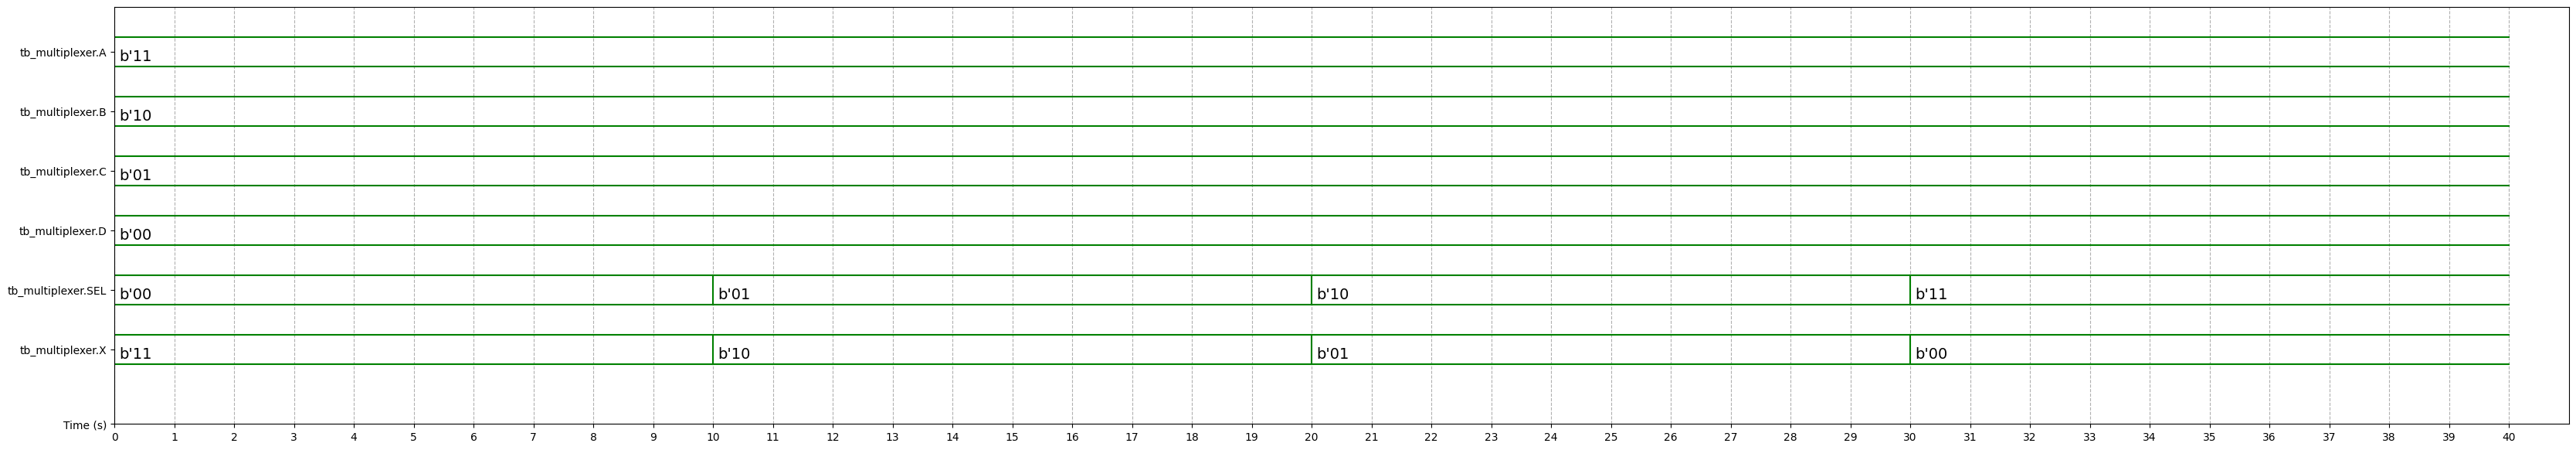

In [ ]:
%%waveform waveform.vcd
sign_list = ['tb_multiplexer.A', 'tb_multiplexer.B', 'tb_multiplexer.C', 'tb_multiplexer.D', 'tb_multiplexer.SEL', 'tb_multiplexer.X']
time_begin = 0
time_end = 40
base = 'bin' # bin, dec, dec2, hex, octal


5. Here is a demo testbench result for the multiplexer;

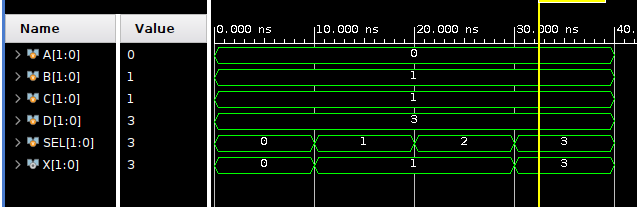

# Q3-Demultiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the demultiplexer as shown below using case statements. Saved the Verilog description as q3_xxxxxxx.v, and q3_tb_xxxxxxx.v;
3. The specifications of the demultiplexer are:
  - It is a 1-to-4 demultiplexer.
  - Input A and outputs W, X, Y, and Z are all 2-bit vectors.
  - SEL is a 2-bit select input.
  - Each of the 4 combinations of SEL will determine which of the 4 outputs will receive the value of input A.
  - When one output is equal to A, all other outputs are equal to ‘0’.

| SEL   | OUTPUT W | OUTPUT X | OUTPUT Y | OUTPUT Z |
|-------|----------|----------|----------|----------|
| 2'b00 | A        | 2'b00    | 2'b00    | 2'b00    |
| 2'b01 | 2'b00    | A        | 2'b00    | 2'b00    |
| 2'b10 | 2'b00    | 2'b00    | A        | 2'b00    |
| 2'b11 | 2'b00    | 2'b00    | 2'b00    | A        |


4. Write a Verilog test stimulus module for the demultiplexer;





In [3]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module demultiplexer(
    input [1:0] A,   // 2-bit input
    input [1:0] SEL, // 2-bit selector
    output reg [1:0] W,
    output reg [1:0] X,
    output reg [1:0] Y,
    output reg [1:0] Z
);

// Demultiplexer logic using case statement
always @(*) begin
    // Default all outputs to 0
    W = 2'b00;
    X = 2'b00;
    Y = 2'b00;
    Z = 2'b00;

    // Assign A to the correct output based on SEL
    case (SEL)
        2'b00: W = A;
        2'b01: X = A;
        2'b10: Y = A;
        2'b11: Z = A;
        default: begin
            W = 2'b00;
            X = 2'b00;
            Y = 2'b00;
            Z = 2'b00;
        end
    endcase
end

endmodule

module tb_demultiplexer;
    reg [1:0] A;
    reg [1:0] SEL;
    wire [1:0] W, X, Y, Z;

    // Instantiate the demultiplexer
    demultiplexer uut (
        .A(A),
        .SEL(SEL),
        .W(W),
        .X(X),
        .Y(Y),
        .Z(Z)
    );

    initial begin
        $dumpfile("waveform.vcd");  // Dump waveform data
        $dumpvars(0, tb_demultiplexer);

        // Monitor values for debugging
        $monitor("Time: %0d | A=%b | SEL=%b | W=%b | X=%b | Y=%b | Z=%b",
                 $time, A, SEL, W, X, Y, Z);

        // Initialize input
        A = 2'b11; // Test input value

        // Apply test cases with SEL changing
        SEL = 2'b00; #10;  // Expect W=A, others 0
        SEL = 2'b01; #10;  // Expect X=A, others 0
        SEL = 2'b10; #10;  // Expect Y=A, others 0
        SEL = 2'b11; #10;  // Expect Z=A, others 0

        // End simulation
        $finish;
    end
endmodule

Installing. Please wait... done!
VCD info: dumpfile waveform.vcd opened for output.
Time: 0 | A=11 | SEL=00 | W=11 | X=00 | Y=00 | Z=00
Time: 10 | A=11 | SEL=01 | W=00 | X=11 | Y=00 | Z=00
Time: 20 | A=11 | SEL=10 | W=00 | X=00 | Y=11 | Z=00
Time: 30 | A=11 | SEL=11 | W=00 | X=00 | Y=00 | Z=11



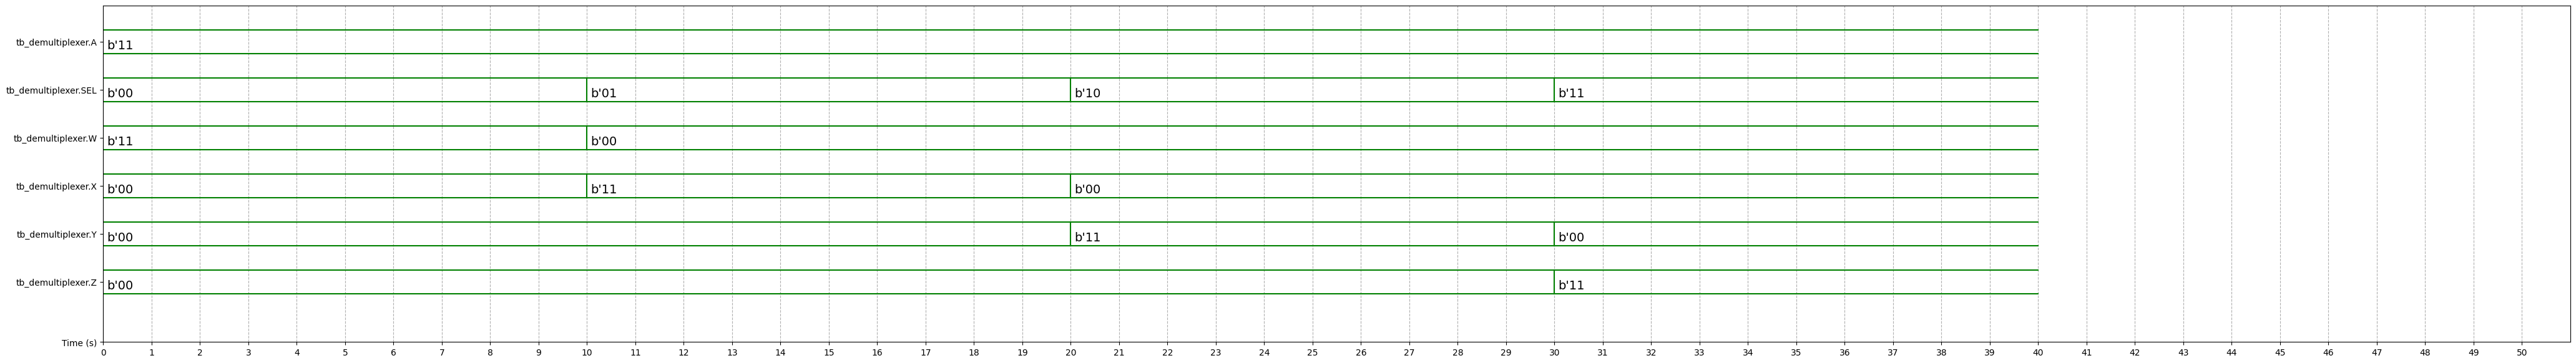

In [4]:
%%waveform waveform.vcd
sign_list = ['tb_demultiplexer.A', 'tb_demultiplexer.SEL', 'tb_demultiplexer.W', 'tb_demultiplexer.X', 'tb_demultiplexer.Y', 'tb_demultiplexer.Z']
time_begin = 0
time_end = 50
base = 'bin' # bin, dec, dec2, hex, octal


5. Here is a demo testbench result for the demultiplexer;

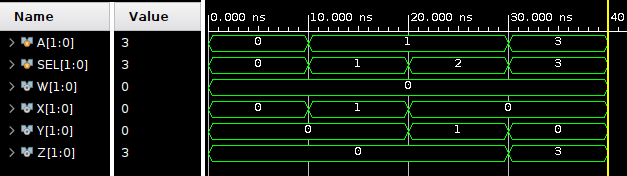

# Q4-Nibbleadd

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the nibbleadd.
3. The specifications for this module nibbleadd are:
  - Inputs A and B are both 8-bit vector inputs. Output q is 5-bit wide.
  - When ctrl input is ‘0’, output is the sum of lowest 4 bits of A and B.
  - When ctrl input is ‘1’, output is the sum of upper 4 bits of A and B.
  - Here is Verilog code template. You have to copy the template into your source file.

4. Write a Verilog test stimulus module for the nibbleadd;

In [8]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module nibbleadd(
    input [7:0] A,  // 8-bit input A
    input [7:0] B,  // 8-bit input B
    input ctrl,     // Control signal
    output reg [4:0] q  // 5-bit output (sum)
);

// Nibble Addition Logic
always @(*) begin
    if (ctrl == 1'b0)
        q = A[3:0] + B[3:0];  // Sum of lower 4 bits
    else
        q = A[7:4] + B[7:4];  // Sum of upper 4 bits
end

endmodule

module tb_nibbleadd;
    reg [7:0] A, B;  // 8-bit inputs
    reg ctrl;        // Control signal
    wire [4:0] q;    // 5-bit output

    // Instantiate the nibbleadd module
    nibbleadd uut (
        .A(A),
        .B(B),
        .ctrl(ctrl),
        .q(q)
    );

    initial begin
        $dumpfile("waveform.vcd");  // Dump waveform data
        $dumpvars(0, tb_nibbleadd);

        // Monitor values for debugging
        $monitor("Time: %0d | A=%h | B=%h | ctrl=%b | q=%h",
                 $time, A, B, ctrl, q);

        // Test Cases
        A = 8'hF2; B = 8'hCE; ctrl = 0; #10;  // Lower nibble sum
        A = 8'h81; B = 8'h63; ctrl = 0; #10;
        A = 8'h76; B = 8'hED; ctrl = 0; #10;
        A = 8'hC6; B = 8'hAA; ctrl = 0; #10;

        ctrl = 1; #10;  // Switch to upper nibble sum
        A = 8'hF2; B = 8'hCE; #10;
        A = 8'h81; B = 8'h63; #10;
        A = 8'h76; B = 8'hED; #10;
        A = 8'hC6; B = 8'hAA; #10;

        // End simulation
        $finish;
    end

endmodule

VCD info: dumpfile waveform.vcd opened for output.
Time: 0 | A=f2 | B=ce | ctrl=0 | q=10
Time: 10 | A=81 | B=63 | ctrl=0 | q=04
Time: 20 | A=76 | B=ed | ctrl=0 | q=13
Time: 30 | A=c6 | B=aa | ctrl=0 | q=10
Time: 40 | A=c6 | B=aa | ctrl=1 | q=16
Time: 50 | A=f2 | B=ce | ctrl=1 | q=1b
Time: 60 | A=81 | B=63 | ctrl=1 | q=0e
Time: 70 | A=76 | B=ed | ctrl=1 | q=15
Time: 80 | A=c6 | B=aa | ctrl=1 | q=16



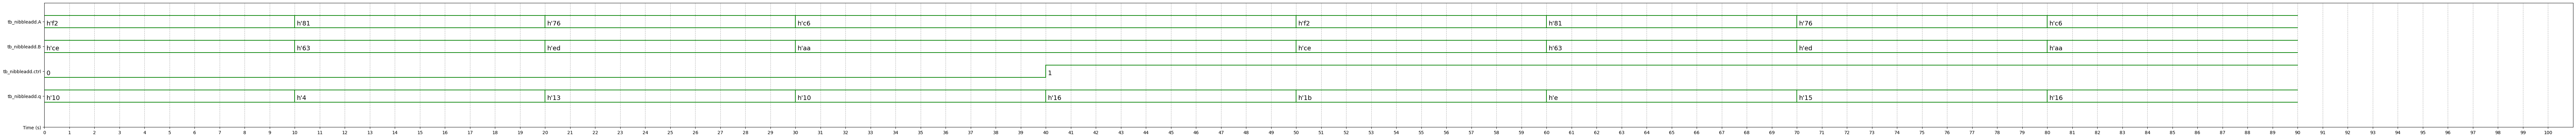

In [13]:
%%waveform waveform.vcd
sign_list = ['tb_nibbleadd.A', 'tb_nibbleadd.B', 'tb_nibbleadd.ctrl', 'tb_nibbleadd.q']
time_begin = 0
time_end = 100
base = 'hex' # bin, dec, dec2, hex, octal


5. Here is a demo testbench result for the nibbleadd;

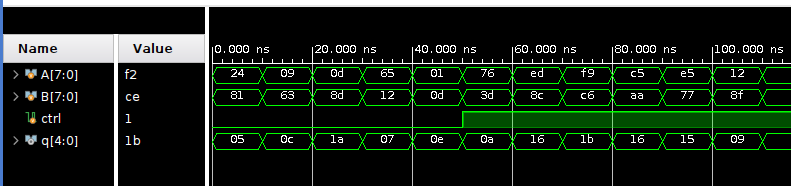

# Q5-CCTA

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the CCTA.
3. The specifications for this module CCTA are:
  - Inputs A, B and C are 4-bit vector inputs.
  - Output q is 5-bit wide.
  - rst is active high, when activated q is set to 0;
  - When ctrl input is ‘0’, output q is the sum of A and B.
  - When ctrl input is ‘1’, output q is the difference of A and C.

4. Write a Verilog test stimulus module for the CCTA;

In [18]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module CCTA(
    input [3:0] A,   // 4-bit input A
    input [3:0] B,   // 4-bit input B
    input [3:0] C,   // 4-bit input C
    input rst,       // Reset (active high)
    input ctrl,      // Control signal
    output reg [4:0] q  // 5-bit output
);

// CCTA Logic
always @(*) begin
    if (rst)
        q = 5'b00000;  // Reset condition, set q to 0
    else begin
        if (ctrl == 1'b0)
            q = A + B;  // Sum of A and B when ctrl = 0
        else
            q = A - C;  // Difference of A and C when ctrl = 1
    end
end

endmodule


module tb_CCTA;
    reg [3:0] A, B, C;  // 4-bit inputs
    reg rst, ctrl;      // Control and reset signals
    wire [4:0] q;       // 5-bit output

    // Instantiate the CCTA module
    CCTA uut (
        .A(A),
        .B(B),
        .C(C),
        .rst(rst),
        .ctrl(ctrl),
        .q(q)
    );

    initial begin
        $dumpfile("waveform.vcd");  // Dump waveform data
        $dumpvars(0, tb_CCTA);

        // Monitor values for debugging
        $monitor("Time: %0d | A=%h | B=%h | C=%h | rst=%b | ctrl=%b | q=%h",
                 $time, A, B, C, rst, ctrl, q);

        // Test Cases
        A = 4'h3; B = 4'hA; C = 4'h0; rst = 1; ctrl = 0; #10; // Reset condition
        A = 4'h4; B = 4'h2; C = 4'h6; rst = 0; ctrl = 0; #10;  // q = A + B
        A = 4'h5; B = 4'h7; C = 4'hC; rst = 0; ctrl = 0; #10;  // q = A + B
        A = 4'hF; B = 4'h8; C = 4'hE; rst = 0; ctrl = 0; #10;  // q = A + B
        A = 4'hD; B = 4'h3; C = 4'h5; rst = 0; ctrl = 1; #10;  // q = A - C
        A = 4'h6; B = 4'hC; C = 4'h2; rst = 0; ctrl = 1; #10;  // q = A - C
        A = 4'hD; B = 4'h9; C = 4'h2; rst = 0; ctrl = 1; #10;  // q = A - C

        // End simulation
        $finish;
    end
endmodule

VCD info: dumpfile waveform.vcd opened for output.
Time: 0 | A=3 | B=a | C=0 | rst=1 | ctrl=0 | q=00
Time: 10 | A=4 | B=2 | C=6 | rst=0 | ctrl=0 | q=06
Time: 20 | A=5 | B=7 | C=c | rst=0 | ctrl=0 | q=0c
Time: 30 | A=f | B=8 | C=e | rst=0 | ctrl=0 | q=17
Time: 40 | A=d | B=3 | C=5 | rst=0 | ctrl=1 | q=08
Time: 50 | A=6 | B=c | C=2 | rst=0 | ctrl=1 | q=04
Time: 60 | A=d | B=9 | C=2 | rst=0 | ctrl=1 | q=0b



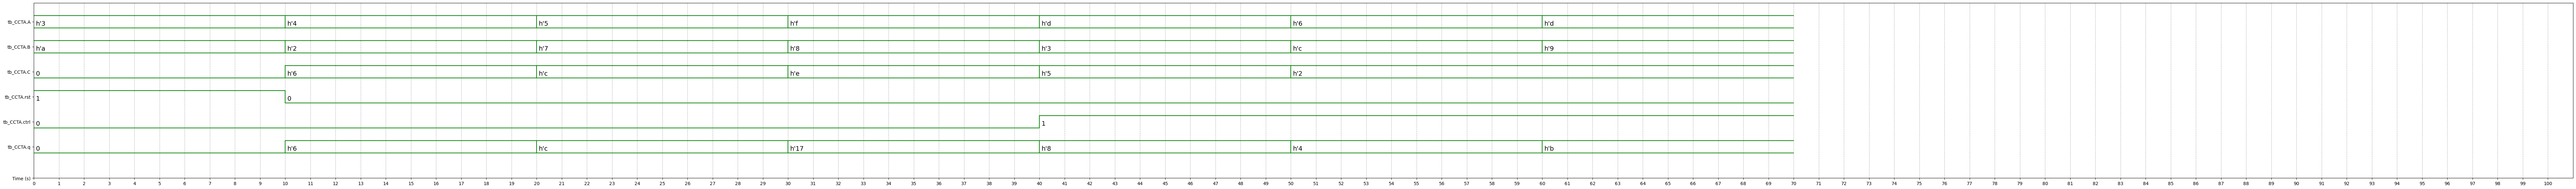

In [19]:
%%waveform waveform.vcd
sign_list = ['tb_CCTA.A', 'tb_CCTA.B', 'tb_CCTA.C', 'tb_CCTA.rst', 'tb_CCTA.ctrl', 'tb_CCTA.q']
time_begin = 0
time_end = 100
base = 'hex' # bin, dec, dec2, hex, octal


5. Here is a demo testbench result for the CCTA;

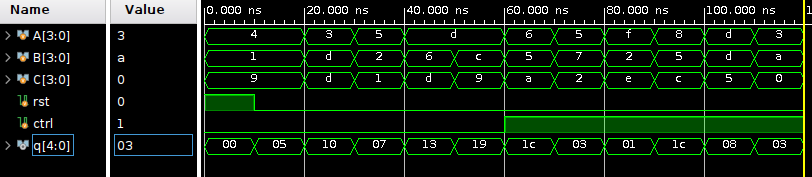